<a href="https://colab.research.google.com/github/kartiksharma2383/Machine-Learning/blob/main/K_Means_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# K Means Clustering(It is an Unsupervised ML algorithm which groups unlabeled dataset into different clusters. It is used to organize data into groups based on their similarity).
# pairwise_distances_argmin: It is a function from sklearn.metrics that finds the indices of the closest points in one array to each point in another array, based on pairwise distances.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

In [6]:
# make_blobs is a function in the sklearn.datasets module that generates isotropic Gaussian blobs for clustering. It's often used to create synthetic datasets for testing clustering algorithms.
# [:n_clusters]: It slices the randomly permuted array and takes the first n_clusters elements.
# centers = x[i]: It is used to select the initial cluster centers from x data array where each row represents data point, i is the array of randomly selected indices that you obtained from the previous line (i = rng.permutation(x.shape[0])[:n_clusters]).
# max_iter : Maximum no. of iterations the algorithm will run in a single initialization.
# np.inf: It is a positive infinity number that’s bigger than any real number we can store.
# rng.permutation: It randomly reorders a sequence of numbers.
# n_init: number of initializations.
# tol=1e-4 : It is the tolerance for convergence, minimum amount of change in cluster centers between iterations that we consider “significant.”
# X[rng.randint(X.shape[0])]: It is used when cluster ends up with no points assigned.
# X.shape[0]: number of rows in X (i.e., number of data points).
# rng.randint(X.shape[0]): It picks a random index from 0 to n_samples-1.
# X[...]: It selects the data point at that random index.
# np.linalg.norm(centers - new_centers): This computes the Euclidean distance between the old and new centers, across all clusters.
def kmeans_from_scratch(X, n_clusters=4, max_iter=300, tol=1e-4, n_init=10, random_state=None):
    rng = np.random.RandomState(random_state)
    best_inertia = np.inf
    best_centers = None
    best_labels = None

    for i in range(n_init):
        # Step 1: Random initialization
        i = rng.permutation(X.shape[0])[:n_clusters]
        centers = X[i]

        for i in range(max_iter):
            # Step 2: Assign points to nearest cluster
            labels = pairwise_distances_argmin(X, centers)

            # Step 3: Update centers
            new_centers = np.array([
                X[labels == j].mean(axis=0) if np.any(labels == j) else X[rng.randint(X.shape[0])]
                for j in range(n_clusters)
            ])

            # Step 4: Check for convergence
            center_shift = np.linalg.norm(centers - new_centers)
            if center_shift < tol:
                break
            centers = new_centers

        # Step 5: Compute inertia (sum of squared distances to closest center)
        inertia = np.sum((X - centers[labels]) ** 2)
        if inertia < best_inertia:
            best_inertia = inertia
            best_centers = centers
            best_labels = labels

    return best_centers, best_labels, best_inertia

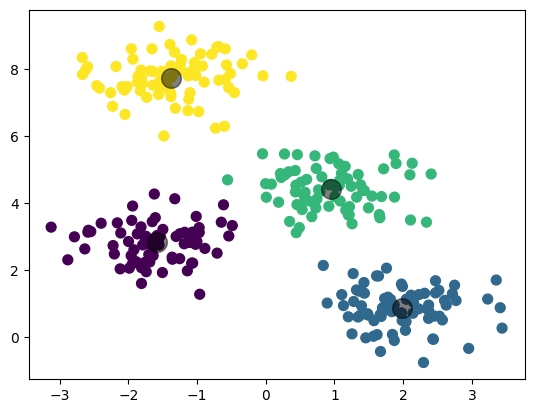

In [7]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
centers, labels, inertia = kmeans_from_scratch(X, n_clusters=4, n_init=10, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()